# Bivariate Visualization



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

%matplotlib inline 


In [3]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

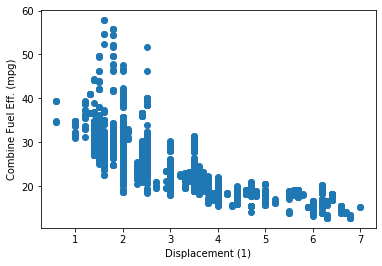

In [6]:
plt.scatter(data= fuel_econ, x ="displ", y = "comb");

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)")

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

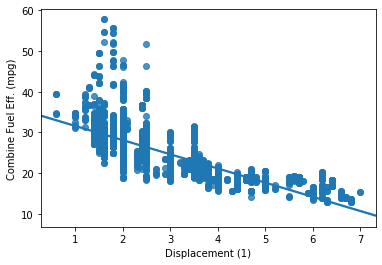

In [7]:
sb.regplot(data= fuel_econ, x ="displ", y = "comb");

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)")

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

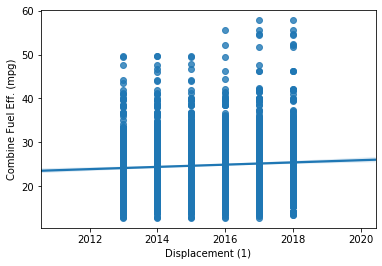

In [8]:
sb.regplot(data= fuel_econ, x ="year", y = "comb");

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)")

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

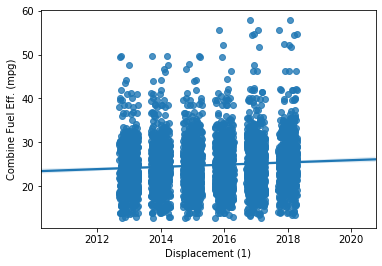

In [9]:
sb.regplot(data= fuel_econ, x ="year", y = "comb", x_jitter = 0.3);

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)")

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

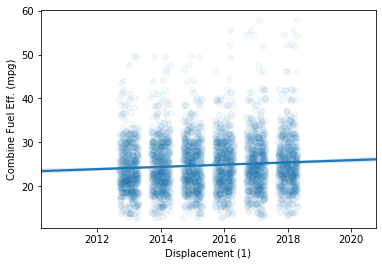

In [11]:
sb.regplot(data= fuel_econ, x ="year", y = "comb", x_jitter = 0.3 ,scatter_kws = {'alpha': 1/20});

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)")

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

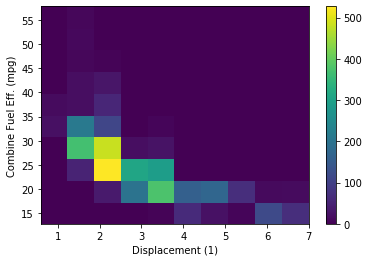

In [13]:
#heat map
plt.hist2d(data= fuel_econ, x ="displ", y = "comb");
plt.colorbar()

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)") 

Text(0, 0.5, 'Combine Fuel Eff. (mpg)')

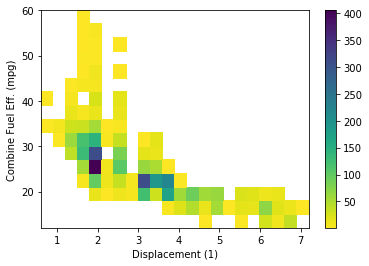

In [16]:
#heat map
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3,3)

plt.hist2d(data= fuel_econ, x ="displ", y = "comb", cmin = 0.5, cmap = "viridis_r", bins=  [bins_x,bins_y]);
plt.colorbar()

plt.xlabel("Displacement (1)")
plt.ylabel("Combine Fuel Eff. (mpg)") 

# Violin Plot

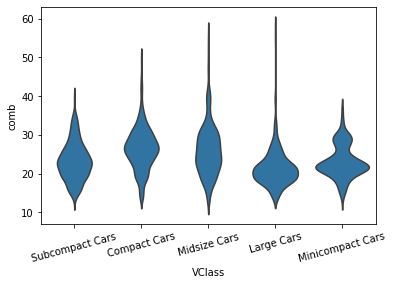

In [20]:
base_color = sb.color_palette()[0]

sb.violinplot(data = fuel_econ, x ="VClass", y ="comb" ,color = base_color, inner = None);

plt.xticks(rotation = 15);

# box plot

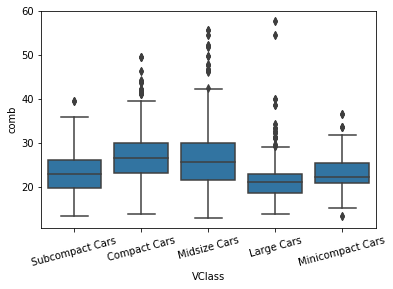

In [23]:
base_color = sb.color_palette()[0]

sb.boxplot(data = fuel_econ, x ="VClass", y ="comb" ,color = base_color);

plt.xticks(rotation = 15);

# Heat map

In [27]:
fuel_econ["trans_type"] = fuel_econ["trans"].apply(lambda x:x.split()[0])
ct_counts = fuel_econ.groupby(['VClass', "trans_type"]).size()
ct_counts =ct_counts.reset_index(name = "count")
ct_counts =ct_counts.pivot(index = "VClass", columns = "trans_type", values = "count")

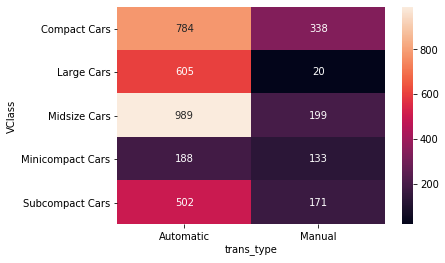

In [29]:
sb.heatmap(ct_counts, annot= True , fmt = "d");

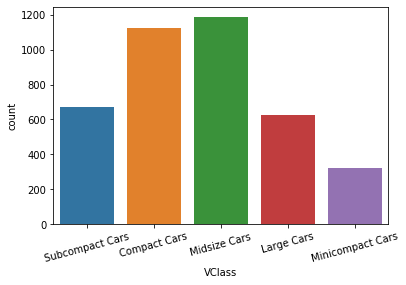

In [32]:
sb.countplot(data= fuel_econ, x ="VClass")
plt.xticks(rotation = 15);

# Faceting 

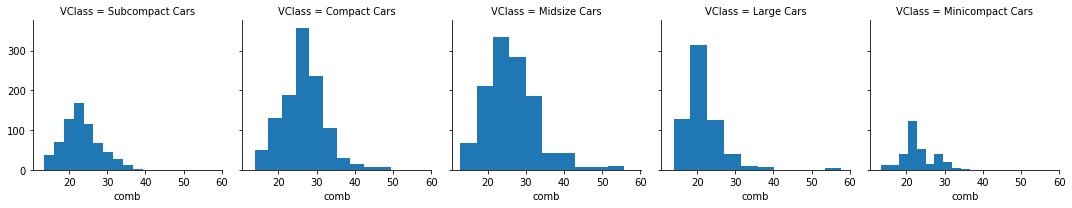

In [38]:
g = sb.FacetGrid(data = fuel_econ, col = "VClass");
g.map(plt.hist, "comb");

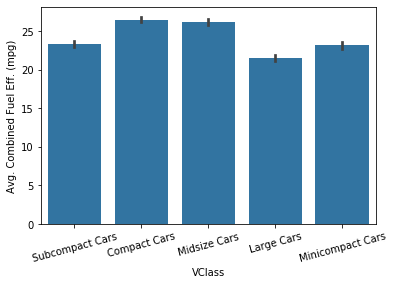

In [40]:
base_color = sb.color_palette()[0]

sb.barplot(data = fuel_econ, x ="VClass", y ="comb" ,color = base_color);

plt.xticks(rotation = 15);

plt.ylabel("Avg. Combined Fuel Eff. (mpg)");

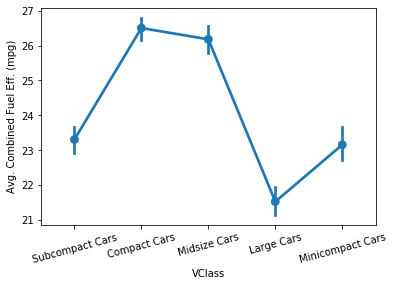

In [42]:


sb.pointplot(data = fuel_econ, x ="VClass", y ="comb" );

plt.xticks(rotation = 15);

plt.ylabel("Avg. Combined Fuel Eff. (mpg)");

In [45]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1]+0.1

displ_binned = pd.cut(fuel_econ["displ"], bins_e, include_lowest = True)
comb_mean= fuel_econ["comb"].groupby(displ_binned).mean()

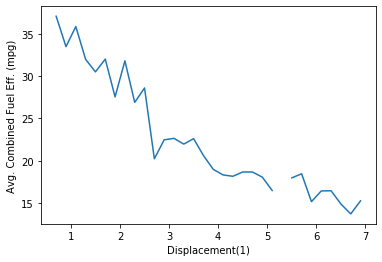

In [47]:


plt.errorbar(x = bins_c, y =comb_mean );

plt.xlabel("Displacement(1)")

plt.ylabel("Avg. Combined Fuel Eff. (mpg)");